# Guide: Pandas

In [2]:
# load libraries and datasets
from datetime import datetime
from IPython.display import Image
import numpy as np
import pandas as pd
from pathlib import Path
import pytz
import seaborn as sns
np.random.seed(42)
path_data = Path.cwd() / 'data'
df1 = pd.read_csv(path_data / 'concat_1.csv')
df2 = pd.read_csv(path_data / 'concat_2.csv')
df3 = pd.read_csv(path_data / 'concat_3.csv')
ebola = pd.read_csv(path_data / 'country_timeseries.csv', parse_dates=['Date'])
gapminder = pd.read_csv(path_data / 'gapminder.tsv', sep='\t')
person = pd.read_csv(path_data / 'survey_person.csv')
pew = pd.read_csv(path_data / 'pew.csv')
scientists = pd.read_csv(path_data / 'scientists.csv')
site = pd.read_csv(path_data / 'survey_site.csv')
survey = pd.read_csv(path_data / 'survey_survey.csv')
tesla = pd.read_csv(path_data / 'tesla_stock_yahoo.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')
visited = pd.read_csv(path_data / 'survey_visited.csv')
weather = pd.read_csv(path_data / 'weather.csv')

Load libraries

In [4]:
# Load libraries
import pandas as pd
import seaborn as sns

# Load data
iris = sns.load_dataset('iris')

Contents
* [Attributes and Methods](#attributes_and_methods)
* [Data Types](#data_types)
* [Series Objects](#series_objects)
* [DataFrame Objects](#dataframe_objects)
* [Subsetting Column, Rows, and Cells](#select_columns_rows_and_cells)
* [Missing Values: NaN](#Missing_Values:_NaN)
* [Grouping](#Grouped_and_Aggregated_Calculations)
* [Concatenation: Adding Row(s) or Columns(s) to DataFrame](#concatenation:_adding_rows_or_columns_to_dataframe)
* [Merging Datasets](#merging_datasets)
* [Tidy Data](#tidy_data)
* [datetime Data Type](#datetime_data_type)
* [Broadcasting: Dealing with Different Sized Objects](#Broadcasting:_Dealing_with_Different_Sized_Objects)
* [Apply Function Across Each Row or Column](#apply_function_across_each_row_or_column)



Difference between str.replace and .replace : 
https://stackoverflow.com/questions/56625031/what-is-the-difference-between-series-replace-and-series-str-replace

In [ ]:
## WHAT IS THIS FOR????

df['column name'] = df['column name'].replace({'part of string':'new string'}, regex=True)
# replacing values in df
# replace values in whole df : replaces exact value matches with ‘a’ to ‘b’ and ‘y’ with ‘z’
# add arg regex=True to match partial string
df.replace({'a': 'b', 'y': 'z'})
# replace values in multiple columns with same value : looks for the value 1 in column ‘a’ and ‘z’ in column ‘b’ and replaces these values with whatever is specified in value
df.replace({'a': 1, 'b': 'z'}, value='replace')
# replace values in multiple columns with multiple values : looks in column 'a' for pattern and replaces it with replace and column 'b' and replaces 'c' with 'z'
replacement = {'pattern':'replace'}
df.replace({'a':replacement, 'b':{'c':'z'}}, regex=True, inplace=True)

<a id='attributes_and_methods'></a>
## Attributes and Methods

Attributes
- **DO NOT HAVE** parentheses >> think of as properties of object
- `.shape` returns number of rows and columns as tuple (rows, columns)
- `.columns` returns column names

Methods
- **HAVE** parentheses >> think of as performing some calculation or operation on object
- `.head()` returns first 5 rows
- `.info()` returns info about dataframe
    
**WARNING** `.loc[]` and `.iloc[]` look similar but use subsetting synthax, like getting first element in Python list: `things[0]`

<a id='data_types'></a>
## Data Types
|Pandas types | Python type | Description |
| ---         | ---         | --- |
| object      | string      | Most common data type |
| int64       | int         | Whole numbers |
| float64     | float       | Numbers with decimals |
| datetime64  | datetime    | datetime is found in the Python standard library <br /> (not loaded by default and needs to be imported) |

<a id='series_objects'></a>
## Series Objects

What is a series?
- One-dimensional container (like a Python built-in list)
    - First column contains indices (get by `.index`, default incrementally increases by 1 starting from 0)
    - Second column contains values (get by `.values`)

Common way to create a series is by passing a list of elements:

In [6]:
# Create series by passing list of elements and indices (optional)
pd.Series(["Wes McKinney", "Creator of Pandas"], index=["Person", "Who"])

Person         Wes McKinney
Who       Creator of Pandas
dtype: object

### Vectorization on Series

- Many methods are vectorized, which is like running a `for` loop on each element

In [5]:
# Add scalar value to each element
(iris["sepal_length"] + 3.5).head()

0    8.6
1    8.4
2    8.2
3    8.1
4    8.5
Name: sepal_length, dtype: float64

In [7]:
# Add vectors element-by-element (must be same length)
(iris["sepal_length"] + iris["petal_length"]).head()

0    6.5
1    6.3
2    6.0
3    6.1
4    6.4
dtype: float64

- `.mean()` returns single value but vectorization adds all elements in series and divides by number of elements

In [24]:
# Condition runs for each element in series and returns boolean
(iris["sepal_length"] > iris["sepal_length"].mean()).head()

0    False
1    False
2    False
3    False
4    False
Name: sepal_length, dtype: bool

In [25]:
# Condition runs for each element in series and returns boolean
# All False rows are discarded (notice the index number starts at )
iris["sepal_length"].loc[iris["sepal_length"] > iris["sepal_length"].mean()].head()

50    7.0
51    6.4
52    6.9
54    6.5
56    6.3
Name: sepal_length, dtype: float64

- `.query` does same thing as code above, is easier to read, but not as robust

In [ ]:
# .query makes code slightly easier to read
(iris.query("sepal_length > sepal_length.mean()")["sepal_length"]).head()

50    7.0
51    6.4
52    6.9
54    6.5
56    6.3
Name: sepal_length, dtype: float64

In [ ]:
# Select values with an explicit list of boolean values
# Get index 0, 1, 4, 5, and 7
manual_bool_values = [True, True, False, False, True, True, False, True]
iris.loc[:7, "sepal_length"][manual_bool_values]

0    5.1
1    4.9
4    5.0
5    5.4
7    5.0
Name: sepal_length, dtype: float64

<a id='dataframe_objects'></a>
## DataFrame Objects

What is a DataFrame?
- Each column in DataFrame is a Series (think of as dictionary of Series objects, with column name as the key and the Series as the value)
- After loading dataframe, good idea to understand it and fix errors first

Common way to create is by passing a dictionary

In [35]:
# Pass dictionary (keys = column names and values = list of values)
# Can optionally set index (default is incremental integers from 0)
pd.DataFrame({
    'Occupation': ['Chemist', 'Statistician'],
    'Born': ['1920-07-25', '1876-06-13'],
    'Died': ['1958-04-16', '1937-10-16'],
    'Age': [37, 61]},
    index=['Rosaline Franklin', 'William Gosset'])

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


An empty DataFrame can be created
- A list of `columns` and/or `index` can optionally be added as needed

In [38]:
# Create empty DataFrame
print(pd.DataFrame())

Empty DataFrame
Columns: []
Index: []


### How to Select Parts of a DataFrame

In [ ]:
# Locate by row index returns Series
scientists.set_index('Name').loc['William Gosset']

Born            1876-06-13
Died            1937-10-16
Age                     61
Occupation    Statistician
Name: William Gosset, dtype: object

In [14]:
# single column with brackets returns Series
scientists['Age']

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [15]:
# multiple columns (as list) with brackets returns DataFrame
scientists[['Age', 'Occupation']]

,Age,Occupation
0,37,Chemist
1,61,Statistician
2,90,Nurse
3,66,Chemist
4,56,Biologist
5,45,Physician
6,41,Computer Scientist
7,77,Mathematician




#### Subsetting with Boolean Vector

In [16]:
# subset rows using boolean vector
scientists[scientists['Age'] > scientists['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician




* Code is kind of hard to read, is using `.query()` better?

In [17]:
scientists.query('Age > Age.mean()')

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


<a id='select_columns_rows_and_cells'></a>
## Select Columns, Rows, and Cells

- `.loc[]` selects data based on column and row names
- `.iloc[]` selects data based on indices numbers
- Slicing works for both index numbers and names

### Select by columns

Select single column
- Each returns the column as a Series
- To return a `DataFrame`, wrap column part in square brackets (pandas interprets the list as a request for multiple columns, even if it only contains one)

In [ ]:
# Select all values in given column by name
iris["sepal_length"].head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [51]:
# Select all rows (:) and given column by column name
iris.loc[:, "sepal_length"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [44]:
# Select all rows (:) and given column by index number
iris.iloc[:, 0].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Select multiple columns
- Each returns the columns as a DataFrame

In [ ]:
# Select all values in given columns by names
iris[["sepal_length", "petal_length"]].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [52]:
# Select all rows (:) and given columns by column names
iris.loc[:, ["sepal_length", "petal_length"]].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [53]:
# Select all rows (:) and given column by index number
iris.iloc[:, [0, 2]].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


### Select by rows

- If the indices are integers (which is what they are by default), `.loc` and `.iloc` will look identical

Select single row
- Each returns the row as a Series
- To return a `DataFrame`, wrap row part in square brackets (pandas interprets the list as a request for multiple rows, even if it only contains one)

In [ ]:
# Select all values in given row by row name
iris.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [ ]:
# Select all values in given row by index number
iris.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Select multiple rows

In [ ]:
# Select all values in given rows by row names
iris.loc[[0, 5]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [ ]:
# Select all values in given rows by index numbers
iris.iloc[[0, 5]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


#### Select by columns and rows simultaneously

Select single value
- Each returns a single value
- To return a `Series`, wrap either the column or row parts in square brackets
- To return a `DataFrame`, wrap both column and row parts in square brackets

In [65]:
# Select a single value by row and column name
iris.loc[0, "sepal_length"]

np.float64(5.1)

In [ ]:
# Select a single value by row and column index numbers
iris.iloc[0, 0]

np.float64(5.1)



<a id='Missing_Values:_NaN'></a>
## Missing Values: NaN
* Missing values displayed as `NaN`, `NAN`, or `nan`

#### NaN during data loading
* Set certain values to NaN: `pd.read_csv(path_data / 'survey_visited.csv', na_values=['DR-1', 622])`
    * Change original NaN values to empty strings: `keep_default_na=False`

#### Check NaN
* Pandas's built-in method NaN checker: `pd.isnull(ebola)`, and non-NaN checker: `pd.notnull(ebola)`
* Check number of NaN in dataframe by returning non-null data for each column: `ebola.info()`

#### Fill in NaN
* Fill in all NaN with passed value: `ebola.fillna(0)`
    * Use last known value: `method='ffill'`
    * Use next known value: `method='bfill'`
* Fill in NaN with values between values above and below it: `ebola.interpolate()`
* Fill in NaN values in specific column(s) : `df.fillna({'column name':new value}, inplace=True)`

#### Remove NaN
* Drop row if any NaN values present: `ebola.dropna()`
    * Define which columns to look in: `subset=['Date', 'Day']`
    * Define amount of elements needed to drop: `how='all'`
    * Set axis: `axis='columns'` or `axis=1` (default: `axis=0`)



#### `NaN` has no concept of equality

In [18]:
# NaN doesn't equal False
np.NaN == False

False

In [19]:
# NaN doesn't equal 0
np.NaN == 0

False

In [20]:
# NaN doesn't equal an empty string
np.NaN == ''

False

In [21]:
# NaN doesn't equal None
np.NaN == None

False

In [22]:
# NaN doesn't even equal NaN
np.NaN == np.NaN

False



#### Calculations with NaN
* Calculations with NaN typically return missing values unless built-in methods ignore missing values (e.g., `skipna` parameter in `mean` and `sum`)

In [23]:
# NaN value in any column causes NaN value in final calculation
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia']
ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_multiple']].head()

,Cases_Guinea,Cases_Liberia,Cases_multiple
0,2776.0,NaN,NaN
1,2775.0,NaN,NaN
2,2769.0,8166.0,10935.0
3,NaN,8157.0,NaN
4,2730.0,8115.0,10845.0


In [24]:
# .sum() method can ignore missing values with skipna arg (default is True)
ebola['Cases_multiple'] = ebola[['Cases_Guinea', 'Cases_Liberia']].sum(axis=1, skipna=True)
ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_multiple']].head()

,Cases_Guinea,Cases_Liberia,Cases_multiple
0,2776.0,NaN,2776.0
1,2775.0,NaN,2775.0
2,2769.0,8166.0,10935.0
3,NaN,8157.0,8157.0
4,2730.0,8115.0,10845.0


In [25]:
# set skipna arg to False to not ignore missing values
ebola['Cases_multiple'] = ebola[['Cases_Guinea', 'Cases_Liberia']].sum(axis=1, skipna=False)
ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_multiple']].head()

,Cases_Guinea,Cases_Liberia,Cases_multiple
0,2776.0,NaN,NaN
1,2775.0,NaN,NaN
2,2769.0,8166.0,10935.0
3,NaN,8157.0,NaN
4,2730.0,8115.0,10845.0




#### Add NaN when re-indexing dataframe
* Common usage when index represents some time interval and want to add more dates

In [26]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [27]:
# find average life expectancy by year
life_exp = gapminder.groupby(['year'])['lifeExp'].mean()
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [28]:
# some years have no data
y2000 = life_exp.loc[life_exp.index > 2000]
y2000

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [29]:
# default fill value for missing indices is NaN
y2000.reindex(range(2000, 2008))

year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
Name: lifeExp, dtype: float64



<a id='Grouped_and_Aggregated_Calculations'></a>
## Grouping

* Grouping returns data type, `DataFrameGroupBy` object, and memory location: `gapminder.groupby('year')`
* If need data from single group (e.g., year 1952): `gapminder.groupby('year').get_group(1952)`  
* If need to iterate through each group one at a time: `for one_group in gapminder.groupby('continent'): print(one_group)` >> returns tuple with 1st element name of group, and 2nd is `DataFrame` of group

Grouping based on "split-apply-combine", meaning split up data, apply function to each part, and combine results to create new dataset

#### Split
* To group by single column, pass column name: `tips.groupby('sex')`, for multiple columns, pass list of column names  

#### Apply and combine 
* Use `.agg()` or `.aggregate()` to apply function to all values and return single value
    * To apply single function, pass single function: `tips.groupby('sex')['tip'].agg(np.mean)`
    * To apply multiple functions, pass as Python list: `tips.groupby('sex')['tip'].agg([np.mean, np.std])`
    * To apply multiple functions on multiple columns, pass as Python dictionary (keys = column name, values = functions): `tips.groupby('sex').agg({'tip':'mean', 'total_bill':'median'})`
    * Can also pass custom function, and can add additional arguments (click hyperlink for examples)
* Use `.transform()` to apply function to all values on one-to-one basis
    * Example how to calculate z-score for tips based on sex's mean: `tips.groupby('sex')['tip'].transform(lambda x: (x - x.mean()) / x.std())`
* Use `.filter()` to subset data by some boolean
    * Example how to keep data if table size observations >30: `tips.groupby('size').filter(lambda x: x['size'].count() >= 30)`

In [30]:
# apply custom function >> calculate mean manually
def calc_mean(values):
sum = 0
for value in values:
sum += value
return(sum / len(values))
tips.groupby('sex')['tip'].agg(calc_mean)

C:\Users\moba1\AppData\Local\Temp\ipykernel_12848\2413614710.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].agg(calc_mean)


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [31]:
# apply custom function with additional arguments >> calculate sex mean - global mean
def mean_diff(values, diff_value):
sum = 0
for value in values:
sum += value
return sum/len(values) - diff_value
tips.groupby('sex')['tip'].agg(mean_diff, diff_value=tips['tip'].mean())

C:\Users\moba1\AppData\Local\Temp\ipykernel_12848\193258787.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].agg(mean_diff, diff_value=tips['tip'].mean())


sex
Male      0.091339
Female   -0.164830
Name: tip, dtype: float64



#### Filling in missing values with groupby calculation

In [32]:
# randomly assign nan to 4 total_bill values in sample of 10 rows
tips_10 = tips.sample(10)
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,NaN,2.00,Male,No,Sun,Dinner,4
211,NaN,5.16,Male,Yes,Sat,Dinner,4
198,NaN,2.00,Female,Yes,Thur,Lunch,2
176,NaN,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [33]:
# calculate total bill means by sex, and use to fill in NaNs
tips_10.groupby('sex')['total_bill'].transform(lambda x: x.fillna(x.mean()))

C:\Users\moba1\AppData\Local\Temp\ipykernel_12848\1315779738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_10.groupby('sex')['total_bill'].transform(lambda x: x.fillna(x.mean()))


24     19.8200
6       8.7700
153    17.9525
211    17.9525
198    13.9300
176    17.9525
192    28.4400
124    12.4800
9      14.7800
101    15.3800
Name: total_bill, dtype: float64



<a id='concatenation:_adding_rows_or_columns_to_dataframe'></a>
## Concatenation: Adding Row(s) or Columns(s) to DataFrame

#### Add row(s) to DataFrame
* Add single row: `pd.concat([df1, pd.DataFrame([['n1', 'n2', 'n3', 'n4']], columns=['A', 'B', 'C', 'D'])])`
    * Common column names assure alignment
* Add multiple rows from leftmost to rightmost: `pd.concat([df1, df2, df3])`
    * Each DataFrame simply "stacked" (notice multiple duplicates of index numbers possible)
    
#### Add column(s) to DataFrame
* Add single column (simply pass new column name and vector): `df1['new_col'] = ['n1', 'n2', 'n3', 'n4']`
* Add multiple columns from leftmost to rightmost: `pd.concat([df1, df2, df3], axis=1)`
    * `.concat` argument `axis=1` sets concatenation to columns (default=0, which is set to add to rows)
    
#### Reset indices during concatenation
* Reset row indices: `pd.concat([df1, df2], ignore_index=True)`
* Reset column indices: `pd.concat([df1, df2], axis=1, ignore_index=True)`

#### Set how join occurs
* Set which data retained: `join='outer'` keeps all rows or columns

In [34]:
# join='inner' only keeps columns with common names
df3.columns = ['A', 'C', 'F', 'H']
print(f'df1 columns are: {list(df1.columns)}')
print(f'df3 columns are: {list(df3.columns)}')
pd.concat([df1, df3], join='inner')

df1 columns are: ['A', 'B', 'C', 'D']
df3 columns are: ['A', 'C', 'F', 'H']


,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11




<a id='merging_datasets'></a>
## Merging Datasets
Instead of simply adding row(s) or column(s) by indices, combine based on common data values (known as "join")

* One-to-one merge: joins one column to another column (no duplicate values present): `site.merge(visited.loc[[0, 2, 6], ], left_on='name', right_on='site')`
* Many-to-one merge: one dataframe has key values that repeat, leftmost DataFrame data duplicated: `site.merge(visited, left_on='name', right_on='site')`
    * Pass columns names as list if merging on multiple columns, okay if names mismatch

#### Arguments
* how=: decide how to merge and which data to retain

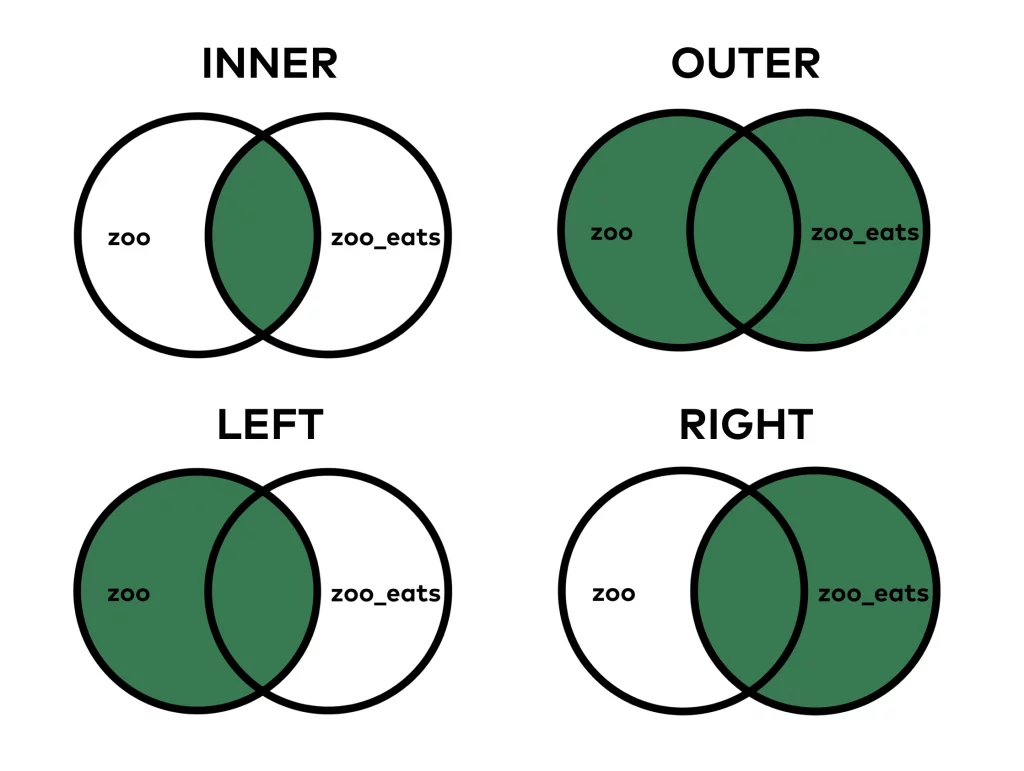

In [35]:
display(Image(path_data / '4-pandas-merge-inner-outer-left-right-1024x771.png', width=400))



* 'inner': DEFAULT - for each key found in both left and right DataFrames, data is merged and retained
* 'outer': all keys are retained, but for each key found in both left and right DataFrames, data is merged
* 'left': all keys in left DataFrame are retained, but for each key found in both left and right DataFrames, data is merged
* 'right': all keys in right DataFrame are retained, but for each key found in both left and right DataFrames, data is merged
    
#### Merging many-to-many examples



* DataFrame contains two records of surveyors' information

In [36]:
person_subset = person.iloc[:2, ]
person_subset

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie




* Another DataFrame contains records of surveyors' measurements

In [37]:
survey_subset = survey.iloc[:7, :]
survey_subset

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50




* Both DataFrames contain the surveyors' unique identifier, using these, can merge the personal information with the measurement information

In [38]:
ps = person_subset.merge(survey_subset, how='inner', left_on='ident', right_on='person')
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50




<a id='tidy_data'></a>
## Tidy Data

* Transform wide to long format: `pd.melt(weather, id_vars=['id', 'year', 'month', 'element'])`
* Transform long to wide format: `weather_melt.pivot_table(index=['id', 'year', 'month', 'variable'], columns='element', values='value').reset_index()`
    
#### String accessor: access the values of the series as strings and apply methods to it
* Split string values in column: `scientists['Name'].str.split(' ')`
    * Argument `expand=True` returns results as DataFrame instead of Series list
    * Can use zip to assign as new columns `scientists['First'], scientists['Last'] = zip(*scientists['Name'].str.split(' '))`
        * `zip` takes set of iterators and returns an iterator that generates tuples of length n (n = shortest iterator length)
        
#### Transform wide to long format: melt

In [39]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116




* Only 'religion' column is a variable, remaining column names are values related to income variable. Good for presenting data, bad for analyzing.

In [40]:
# melt dataframe
pd.melt(pew, id_vars=['religion'], var_name='income', value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8




* Create a new df with columns 'religion', 'income', and 'count'
* Take the first value in the original df's 'religion' column and add to the first row in the new df's 'religion' column
* Take the second column name in the original df and add to the first row in the new df's 'income' column
* Take the first value in the second column name in the original df and add to the first row in the new df's 'count' column
* Next take the second value in the original df's 'religion' column and add to the second row in the new df's 'religion' column
* Take the second column name in the original df and add to the second row in the new df's 'income' column
* Take the second value in the second column name in the original df and add to the second row in the new df's 'count' column
* Repeat for all rows of the original df
* Then repeat process using the third column name in the original df until all columns are completed



#### Transform long to wide format: pivot_table()

In [41]:
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp')
weather_melt.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN




* Change all variables in the 'element' column to column names (other languages call this casting or spreading) and store their values from the 'temp' column
* One main difference is `pivot_table` is a DataFrame method while `melt` is a Pandas function

In [42]:
weather_melt.pivot_table(index=['id', 'year', 'month', 'day'], columns='element', values='temp').reset_index().head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4




* Process is the opposite of melt



#### Shift values in DataFrame

In [43]:
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# each row is shifted down 1 row
weather.shift(1).head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010.0,1.0,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
2,MX17004,2010.0,1.0,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
3,MX17004,2010.0,2.0,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010.0,2.0,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# negative numbers shift row up
weather.shift(-1).head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010.0,1.0,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
1,MX17004,2010.0,2.0,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010.0,2.0,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010.0,3.0,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010.0,3.0,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




<a id='datetime_data_type'></a>
## datetime Data Type

Built-in library for handling dates
* Convert column to datetime during load: `ebola = pd.read_csv(path_data / 'country_timeseries.csv', parse_dates=['Date'], date_format='%m/%d/%Y')`
    * Manually specify date synthax with python's `strptime`: https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior
* Convert column to datetime: `ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')`
* Current date and time: `datetime.now()`

#### Extracting parts of date
* Extract year from single date: `pd.to_datetime('2016-02-29').year` (or directly from column with dt accessor: `ebola['Date'].dt.year`)
* Extract month from single date: `pd.to_datetime('2016-02-29').month`(or directly from column with dt accessor: `ebola['Date'].dt.month`)
* Extract day from single date: `pd.to_datetime('2016-02-29').day`(or directly from column with dt accessor: `ebola['Date'].dt.day`)

#### Create dates
* Create range of dates: `pd.date_range(start='2000-01-01', end='2000-01-05')`
    * Can set freq (default='D' for days) https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

#### Calculations on dates
* Calculate days passed between dates: `ebola['Date'] - ebola['Date'].min()`
    * Returns `timedelta` objects, think of as time lengths
* Calculate based on different time frequencies, if index is datetime: `ebola.resample('M').mean()`
* Calculate based on different time frequencies, if datetime is in column: `ebola.reset_index().groupby(pd.Grouper(key='date', freq='1M')).mean()`

#### Dealing with time zones
* Use library: `import pytz`
* Create time with timezone: `pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')`
* Add timezone to time: `pd.Timestamp('2017-08-29 09:57').tz_localize('US/Pacific')`
* Convert timezones: `pd.Timestamp('2017-08-29 09:57', tz='US/Pacific').tz_convert('US/Eastern')`
* Find durations (timezones MUST match): `pd.Timestamp('2017-08-29 12:57', tz='US/Eastern') - pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')`



#### Subset by specific dates

In [46]:
# use query
tesla.query('Date.dt.year==2010 & Date.dt.month==6')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


In [47]:
# set date to index, then filter
tesla.index = tesla['Date']
tesla.loc['2010-06']

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100




#### Subset by specific times

In [48]:
# set times to index, then filter
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.index = tesla['ref_date']
tesla.loc['0 day':'5 day']

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
ref_date,,,,,,,,
0 days,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,0 days
1 days,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1 days
2 days,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2 days
3 days,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3 days


In [49]:
# use query
tesla.query('ref_date.dt.days<5')

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
ref_date,,,,,,,,
0 days,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,0 days
1 days,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1 days
2 days,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2 days
3 days,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3 days




<a id='Broadcasting:_Dealing_with_Different_Sized_Objects'></a>
## Broadcasting: Dealing with Different Sized Objects

In [50]:
# Series and Series: match by index, remaining indexes filled with NaN
scientists['Age'] + pd.Series([1, 100])

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [51]:
# Series and other objects(np.array): ValueError
# scientists['Age'] + np.array([1, 100])

In [52]:
# DataFrame and boolean vector: IndexError



<a id='apply_function_across_each_row_or_column'></a>
## Apply Function Across Each Row or Column

* "Applies" function to each element individually either by rows or columns
* Similar to writing a for loop across each row or column
* Parentheses () for the passed function NOT needed (current element automatically assigned as 1st argument in passed function)
* If passed function takes multiple arguments, pass as keywords in `.apply()`



#### `.apply()` on Series objects

* Each element assigned as first argument in passed function

In [53]:
# glance at df
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
# custom function to calculate squares
def square(x):
return x ** 2
tips['total_bill'].apply(square).head()

0    288.6601
1    106.9156
2    441.4201
3    560.7424
4    604.6681
Name: total_bill, dtype: float64



* For each element in the series (value in DataFrame column 'total_bill'), it is passed into the `square` function and the square of that element is calculated
* Read as "apply given function to 1st element in series, then 2nd element, and so on until the last element in series"

In [55]:
# for simple functions, use lambda (previous square function in lambda form)
tips['total_bill'].apply(lambda x: x**2).head()

0    288.6601
1    106.9156
2    441.4201
3    560.7424
4    604.6681
Name: total_bill, dtype: float64

In [56]:
# okay to pass multiple args in lambda
tips['total_bill'].apply(lambda x, e=3: x**e).head()

0     4904.335099
1     1105.507304
2     9274.236301
3    13278.380032
4    14868.788579
Name: total_bill, dtype: float64



#### `.apply()` on DataFrame objects

* Column-wise: each column assigned as first argument of passed fuction
    * `axis=0` (default argument)
* Row-wise: each row assigned as first argument of passed function
    * `axis=1`

In [57]:
# column-wise apply
tips.iloc[:5, :2].apply(sum) # axis=0 is default arg

total_bill    96.61
tip           13.09
dtype: float64



* First column in DataFrame is passed as argument in apply function, and so on until all columns applied to

In [58]:
# row-wise apply
tips.iloc[:5, :2].apply(sum, axis=1)

0    18.00
1    12.00
2    24.51
3    26.99
4    28.20
dtype: float64



* First row in DataFrame is passed as argument in apply function, and so on until all rows applied to



## References
* "Pandas for Everyone" by Daniel Y. Chen (2018)